In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
imoveis = pd.read_csv( 'https://raw.githubusercontent.com/Trabalhinho/FIAP_Modulo_2/main/Base_de_dados/Valorizacao_Ambiental.csv', sep = ';' )
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [ ]:
imoveis.shape

(172, 10)

In [ ]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [ ]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


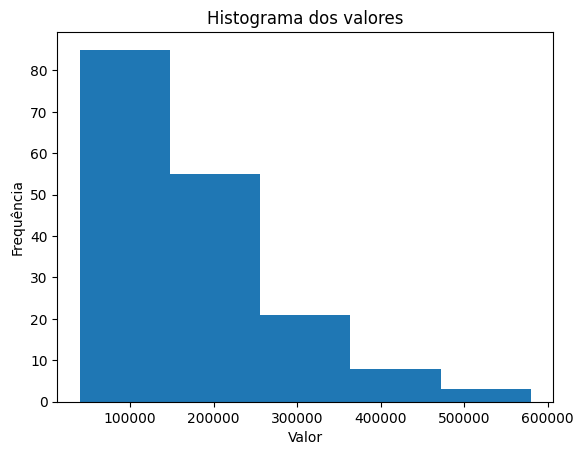

In [ ]:
plt.hist( imoveis['Valor'], bins = 5 )

plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma dos valores')
plt.show()

In [ ]:
imoveis['raiz_valor'] = np.sqrt( imoveis['Valor'] )
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


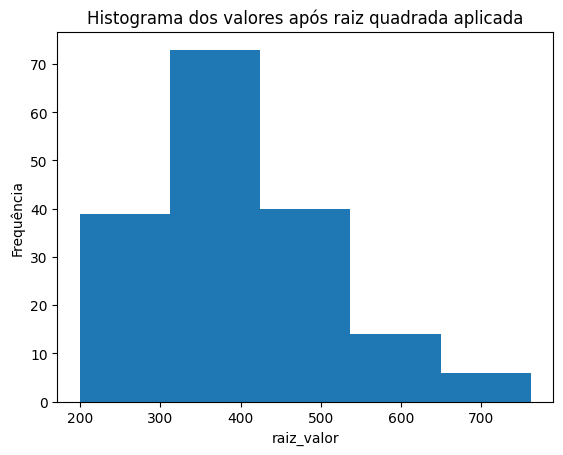

In [ ]:
plt.hist( imoveis['raiz_valor'], bins = 5 )

plt.ylabel('Frequência')
plt.xlabel('raiz_valor')
plt.title('Histograma dos valores após raiz quadrada aplicada')
plt.show()

Text(0, 0.5, 'Qtde de suítes')

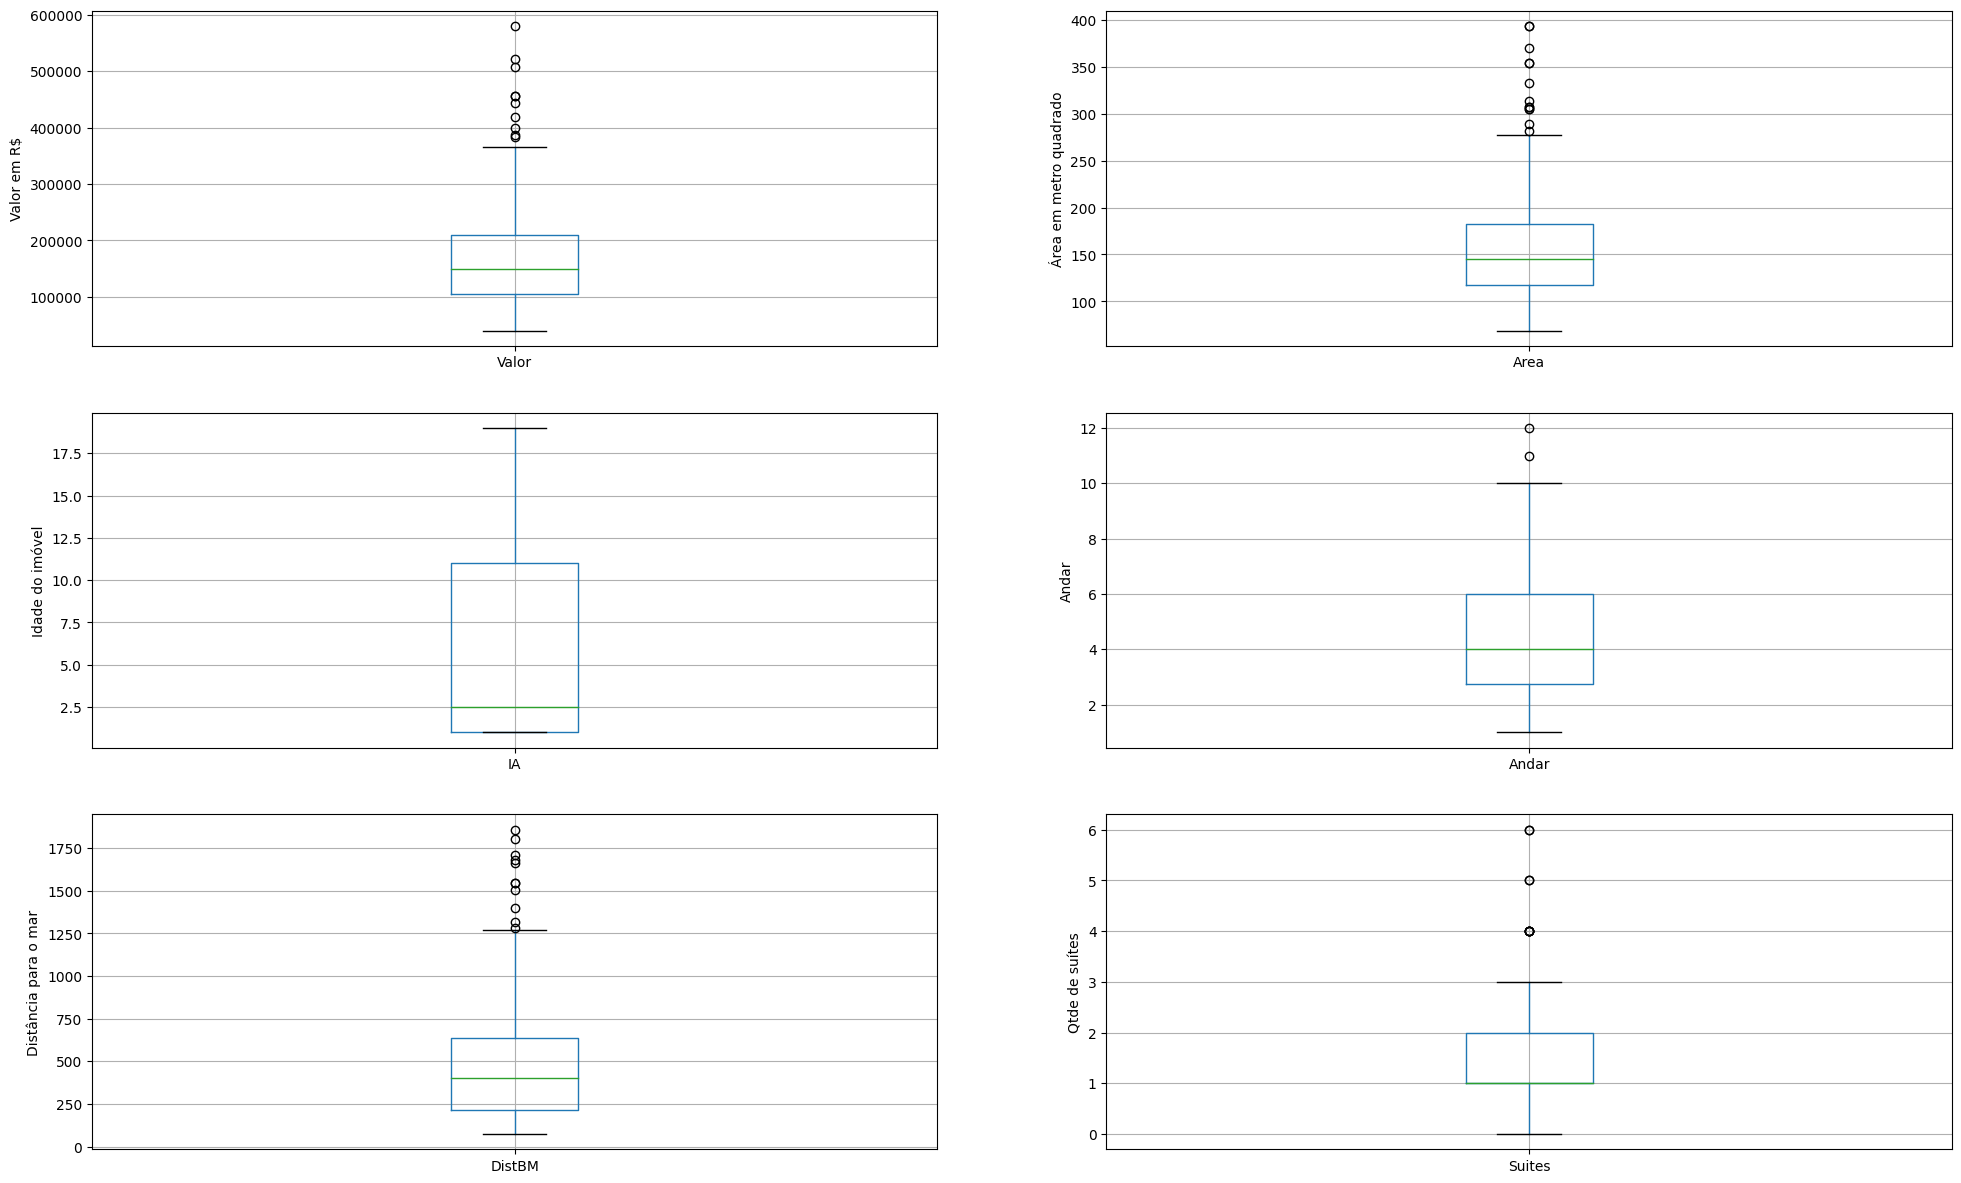

In [ ]:
plt.figure( figsize = ( 24, 20) )

plt.subplot( 4, 2, 1 )
fig = imoveis.boxplot( column = 'Valor' )
fig.set_title( '' )
fig.set_ylabel( 'Valor em R$' )

plt.subplot( 4, 2, 2 )
fig = imoveis.boxplot( column = 'Area' )
fig.set_title( '' )
fig.set_ylabel( 'Área em metro quadrado' )

plt.subplot( 4, 2, 3 )
fig = imoveis.boxplot( column = 'IA' )
fig.set_title( '' )
fig.set_ylabel( 'Idade do imóvel' )

plt.subplot( 4, 2, 4 )
fig = imoveis.boxplot( column = 'Andar' )
fig.set_title( '' )
fig.set_ylabel( 'Andar' )

plt.subplot( 4, 2, 5 )
fig = imoveis.boxplot( column = 'DistBM' )
fig.set_title( '' )
fig.set_ylabel( 'Distância para o mar' )

plt.subplot( 4, 2, 6 )
fig = imoveis.boxplot( column = 'Suites' )
fig.set_title( '' )
fig.set_ylabel( 'Qtde de suítes' )

<Axes: >

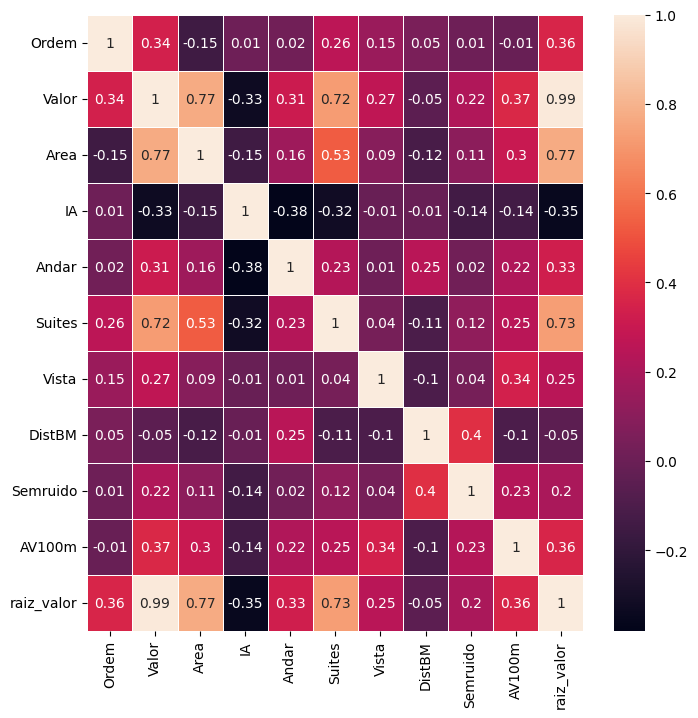

In [ ]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots( figsize = (8,8) )

sns.heatmap( data = correlation_matrix, annot = True, linewidths = .5, ax = ax )

###Aula 3

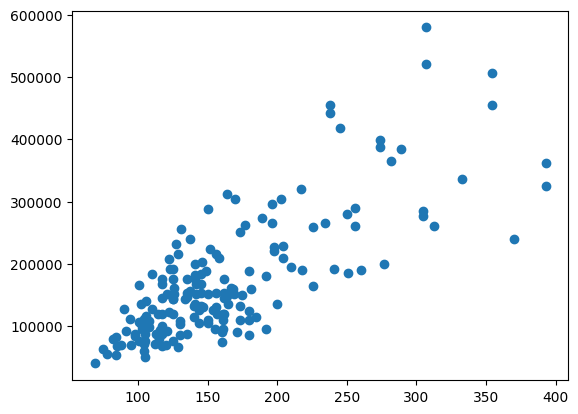

In [ ]:
plt.scatter( 'Area', 'Valor', data = imoveis )

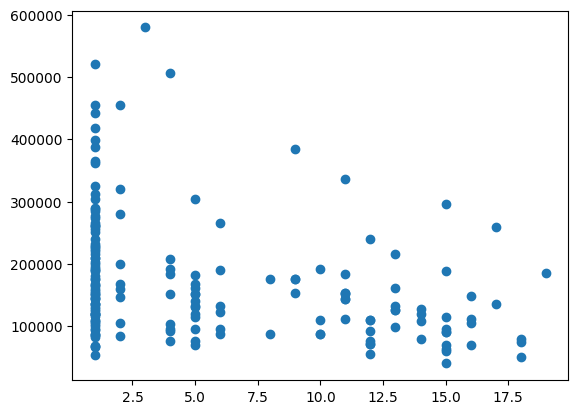

In [ ]:
plt.scatter( 'IA', 'Valor', data = imoveis )

<Axes: xlabel='Vista', ylabel='Valor'>

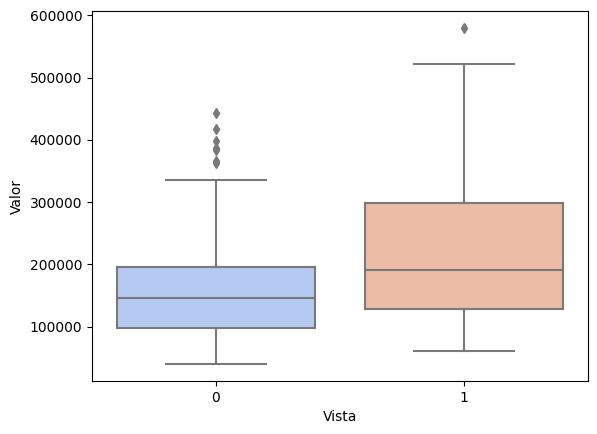

In [ ]:
sns.boxplot( x = 'Vista', y = 'Valor', data = imoveis, palette = 'coolwarm' )

<Axes: xlabel='Semruido', ylabel='Valor'>

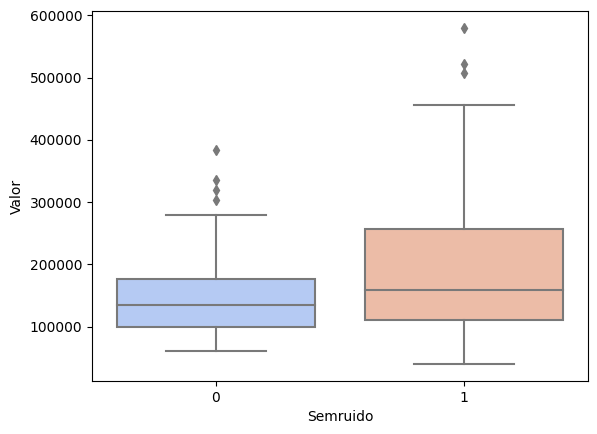

In [ ]:
sns.boxplot( x = 'Semruido', y = 'Valor', data = imoveis, palette = 'coolwarm' )

<Axes: xlabel='AV100m', ylabel='Valor'>

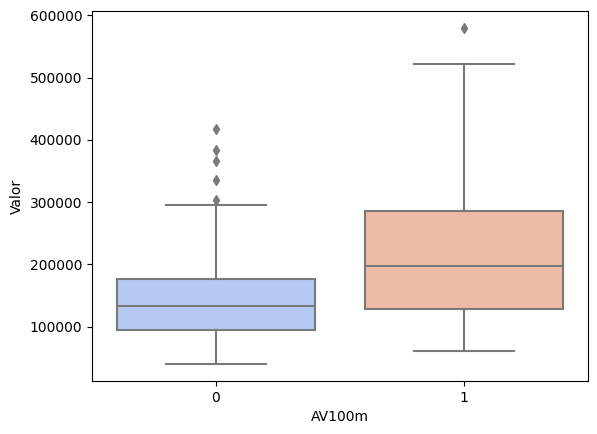

In [ ]:
sns.boxplot( x = 'AV100m', y = 'Valor', data = imoveis, palette = 'coolwarm' )

###Aula 4

In [ ]:
lr = LinearRegression()

In [ ]:
x = imoveis[ ['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM'] ]
y = imoveis[ ['Valor'] ]

In [ ]:
x

,Area,Suites,IA,Semruido,Vista,Andar,AV100m,DistBM
0,168,1,1,1,1,5,0,294
1,129,0,1,1,0,6,0,1505
2,218,1,1,0,0,8,1,251
3,180,1,12,0,0,4,0,245
4,120,1,15,1,0,3,0,956
...,...,...,...,...,...,...,...,...
167,82,0,14,1,0,2,0,485
168,134,0,11,1,1,2,1,827
169,135,2,9,1,1,3,1,414
170,141,2,1,0,0,6,0,305


In [ ]:
y

,Valor
0,160000
1,67000
2,190000
3,110000
4,70000
...,...
167,80000
168,144000
169,176000
170,199956


In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, random_state = 101 )

In [ ]:
lr.fit( x_train, y_train )

LinearRegression()

In [ ]:
y_pred = lr.predict( x_test )

In [ ]:
print( 'Intercepto: ', lr.intercept_ )

Intercepto:  [-45123.57239279]


###Aula 5

In [ ]:
coefficients = pd.concat( [pd.DataFrame(x.columns), pd.DataFrame( np.transpose(lr.coef_) ) ], axis = 1 )
coefficients

,0,0
0,Area,851.222846
1,Suites,33293.190524
2,IA,-634.592156
3,Semruido,16213.425193
4,Vista,64436.057035
5,Andar,5635.703634
6,AV100m,-8394.553091
7,DistBM,-1.037290


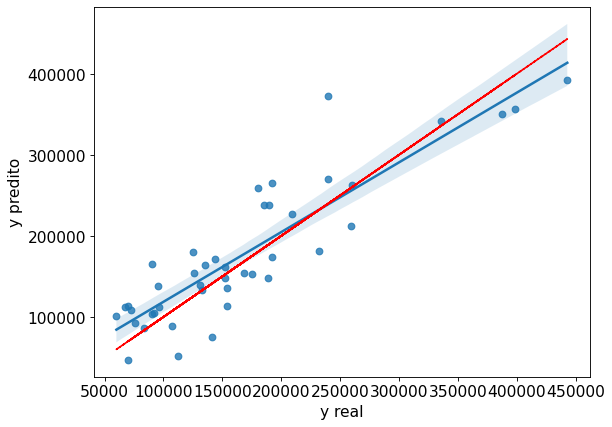

In [ ]:
fig = plt.figure( figsize = (8,6), dpi = 80 )
plt.rcParams.update( {'font.size': 14} )
ax = sns.regplot( x = y_test, y = y_pred )
ax.set( xlabel = 'y real', ylabel = 'y predito' )
ax = plt.plot( y_test, y_test, '--r' )

plt.show()

In [ ]:
MAE = mean_absolute_error( y_test, y_pred )
MSE = mean_squared_error( y_test, y_pred )
r2 = r2_score( y_test, y_pred )

print( 'MAE: ', MAE )
print( 'MSE: ', MSE )
print( 'r²:', r2 )


MAE:  34944.48806408368
MSE:  1877178888.6453397
r²: 0.7703483831500703


#### Árvore de decisão

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_dtr = DecisionTreeRegressor( random_state = 101, max_depth = 10 )
model_dtr.fit( x_train, y_train )

DecisionTreeRegressor(max_depth=10, random_state=101)

In [ ]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [ ]:
MAE = mean_absolute_error( y_test, y_pred_model_dtr )
MSE = mean_squared_error( y_test, y_pred_model_dtr )
r2 = r2_score( y_test, y_pred_model_dtr )

print( 'MAE: ', MAE )
print( 'MSE: ', MSE )
print( 'r²:', r2 )


MAE:  53620.51181247693
MSE:  4798761222.184858
r²: 0.4129258110574725


###SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR( kernel = 'linear' )

In [ ]:
svr.fit( x_train, y_train )

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [ ]:
y_pred_svr = svr.predict( x_test )

In [ ]:
MAE = mean_absolute_error( y_test, y_pred_svr )
MSE = mean_squared_error( y_test, y_pred_svr )
r2 = r2_score( y_test, y_pred_svr )

print( 'MAE: ', MAE )
print( 'MSE: ', MSE )
print( 'r²:', r2 )


MAE:  45946.312892795126
MSE:  3866184038.3421135
r²: 0.5270160873770587
